### AdaBoost Regression with categorical data

Data comes from Kaggle (polynomial regression)
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download

Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:
- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.rs

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container {width:100% !important; }<style>"))

In [4]:
dataset = pd.read_csv('Student_Performance.csv')
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


#### Separate X features & y labels

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
X[0], y[0]

(array([7, 99, 'Yes', 9, 1], dtype=object), 91.0)

#### Encode categorical data

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
X[0:5]

array([[1.0, 7, 99, 9, 1],
       [0.0, 4, 82, 4, 2],
       [1.0, 8, 51, 7, 2],
       [1.0, 5, 52, 5, 2],
       [0.0, 7, 75, 8, 5]], dtype=object)

#### SPLIT into Training & Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### TRAIN the model

In [10]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

#### TEST the model

In [12]:
y_pred = model.predict(X_test)
new_df = pd.DataFrame({ 'y_pred': y_pred.round(1),    'y_test': y_test})
new_df.head()

,y_pred,y_test
0,47.7,53.0
1,54.1,50.0
2,77.6,80.0
3,27.9,24.0
4,67.0,64.0


#### EVALUATE the Model

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Metrics to validate how good the model is

mae = mean_absolute_error(new_df['y_test'], new_df['y_pred']).round(15)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(new_df['y_test'], new_df['y_pred']).round(5)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse).round(5)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(new_df['y_test'], new_df['y_pred']).round(7)
print(f"R-squared: {r2}")

n = X.shape[0]
k = X.shape[1]
r2_adj = round((1 - (1 - r2) * (n - 1) / (n - k - 1)),7)
print(f"R-squared adjusted: {r2_adj}")

Mean Absolute Error (MAE): 2.31015
Mean Squared Error (MSE): 8.52711
Root Mean Squared Error (RMSE): 2.92012
R-squared: 0.9752193
R-squared adjusted: 0.9752069


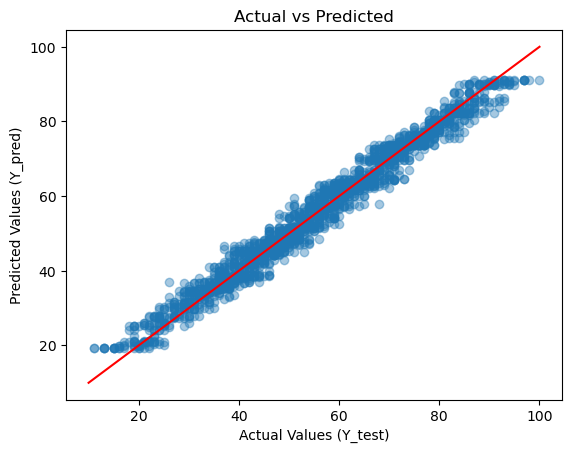

In [14]:
#Scatter Plot
plt.scatter(new_df['y_test'], new_df['y_pred'], alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.title('Actual vs Predicted')
plt.show()

#### PREDICT

In [16]:
# New students
predicted_performance = model.predict([[0, 4.99, 69.44, 6.5, 4.6]])
predicted_performance 

array([54.95074153])

If a student does not participare in Extracurricular Act., studies for 4.99 hours, have previously scored 69.44, slept for 6.5 hours and have practiced 4.6 sample questions, then his/hers final performance would be 55. 

Still a very good model, but comparison to the prior models, this comes last in the ranking

In [17]:
# New students
predicted_performance = model.predict([[1, 8, 85, 9, 10]])
predicted_performance 

array([80.4838013])